In [ ]:
%pip install -q openai pandas-gpt

from IPython.display import clear_output, display
clear_output()

In [2]:
import openai
openai.api_key = input('Enter API key from (https://platform.openai.com/account/api-keys): ')
clear_output()

In [3]:
import pandas as pd
import pandas_gpt

df = pd.read_csv('https://gist.githubusercontent.com/bluecoconut/9ce2135aafb5c6ab2dc1d60ac595646e/raw/c93c3500a1f7fae469cba716f09358cfddea6343/sales_demo_with_pii_and_all_states.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977


In [4]:
df.ask('remove PII, including address')

,Order ID,Product,Quantity Ordered,Price Each,Order Date
0,141234,iPhone,1.0,700.00,01/22/19 21:25
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59
...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39


In [5]:
df.ask('which day of the week had the largest number of orders?')

'Tuesday'

In [6]:
df.ask('filter by purchases in Laurenchester, NY', verbose=True)


```python
import pandas as pd

def process(df):
    df = df[df['Purchase Address'].str.contains('Laurenchester, NY')]
    return df
```


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684
140484,276018,Google Phone,1.0,600.00,10/24/19 01:46,"78382 Noah Stream Suite 585, North Laurenchest...",8086-9573-0018-6582,306-25-7380


In [7]:
df.ask.code('add a new Category column with values "cheap", "regular", or "expensive"')

import pandas as pd

def process(df):
    # Create a new column named "Category" with default value "expensive"
    df['Category'] = 'expensive'
    
    # Define the category thresholds and corresponding labels
    category_rules = [
        {"max_price": 50, "label": "cheap"},
        {"min_price": 50, "max_price": 500, "label": "regular"}
    ]
    
    # Iterate through each row and update the "Category" column based on the price
    for index, row in df.iterrows():
        price = row['Price Each']
        
        # Assign the correct category based on the price
        for rule in category_rules:
            if 'min_price' in rule and price >= rule['min_price'] and price <= rule['max_price']:
                df.at[index, 'Category'] = rule['label']
            elif 'max_price' in rule and price <= rule['max_price']:
                df.at[index, 'Category'] = rule['label']
    
    # Return the updated DataFrame
    return df



In [8]:
df = df.ask('add a new Category column with values "cheap", "regular", or "expensive"')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN,Category
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008,expensive
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892,regular
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943,regular
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684,regular
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977,regular
...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"0918 Sellers Stravenue, Murrayport, VA 23529",6330-9667-7648-5375,326-43-8038,regular
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"8646 Higgins Road Apt. 673, East Luke, WI 54318",7928-0521-1139-8895,802-83-9528,regular
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"962 Mcbride Motorway Apt. 085, Williamshaven, ...",8809-4349-6427-8935,157-00-6893,regular
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"86305 Ricky Radial Apt. 414, Morachester, MO 6...",0526-5467-8300-3974,714-39-2575,regular


In [9]:
most_popular = df.ask('what are the top 10 most popular products, as a table')
most_popular

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
15,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
17,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
2,27in FHD Monitor,7550.0
18,iPhone,6849.0
1,27in 4K Gaming Monitor,6244.0


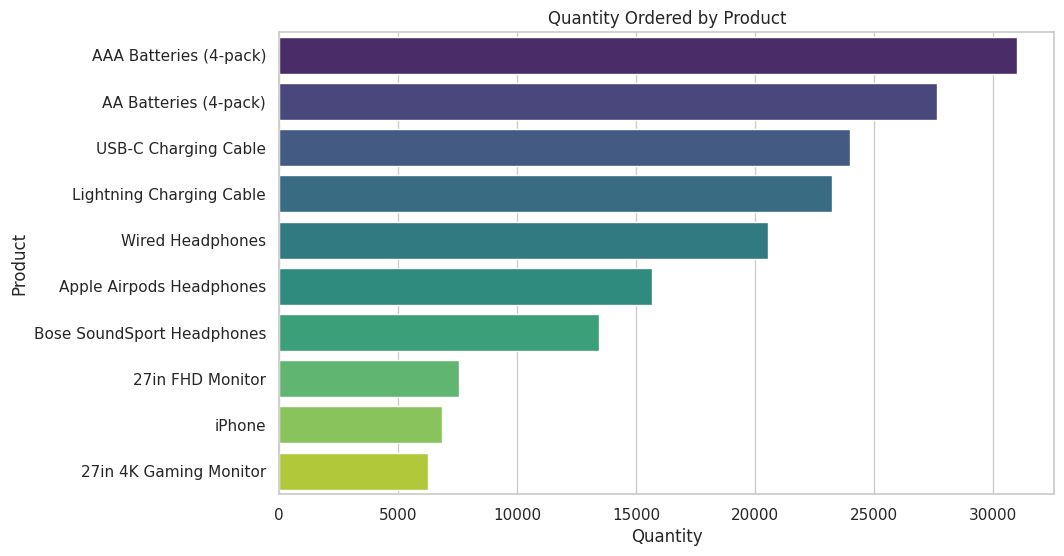

In [10]:
most_popular.ask('horizontal bar plot with nice style')

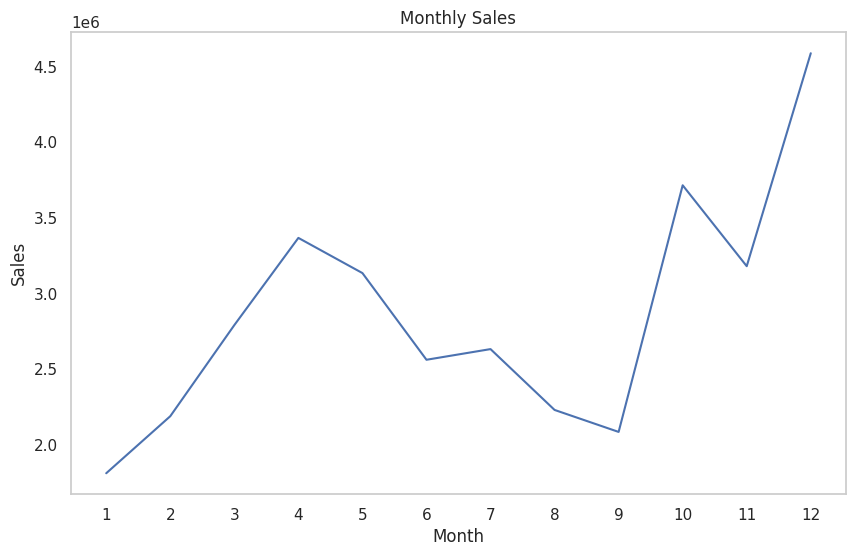

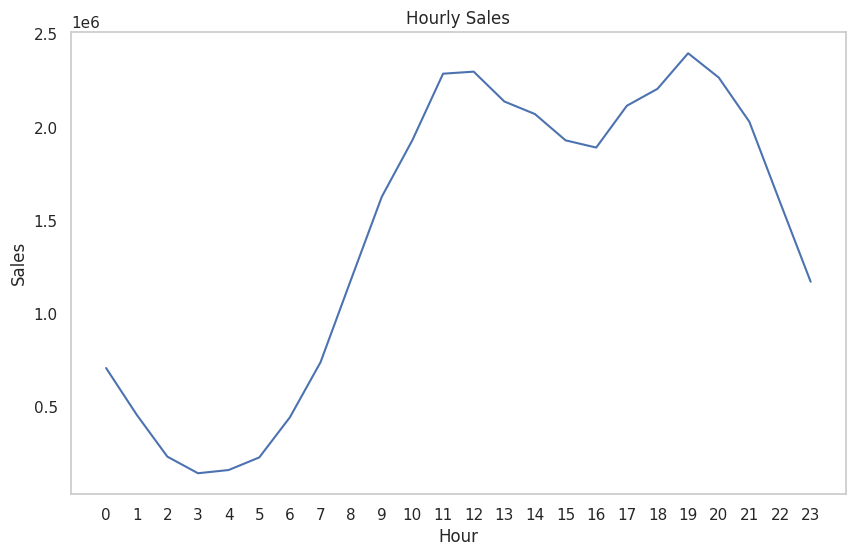

In [11]:
df.ask('plot monthly and hourly sales')

In [16]:
df.ask('convert prices from USD to EUR using a free API', verbose=True)


```python
import requests

def process(df):
    # Define the API endpoint
    api_url = "https://api.exchangerate-api.com/v4/latest/USD"

    # Send a GET request to the API endpoint
    response = requests.get(api_url)

    # If the API call is successful
    if response.status_code == 200:
        # Get the exchange rates
        exchange_rates = response.json()["rates"]

        # Convert prices from USD to EUR
        df["Price Each"] = df["Price Each"] * exchange_rates["EUR"]

    return df
```

Note: This function uses the `requests` library to send a GET request to the exchange rate API and retrieve the exchange rates for USD to EUR. It then converts the prices in the DataFrame by multiplying with the EUR exchange rate.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN,Category
0,141234,iPhone,1.0,637.70000,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008,expensive
1,141235,Lightning Charging Cable,1.0,13.61945,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892,regular
2,141236,Wired Headphones,2.0,10.92289,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943,regular
3,141237,27in FHD Monitor,1.0,136.64089,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684,regular
4,141238,Wired Headphones,1.0,10.92289,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977,regular
...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,13.61945,12/11/19 20:58,"0918 Sellers Stravenue, Murrayport, VA 23529",6330-9667-7648-5375,326-43-8038,regular
185946,319667,AA Batteries (4-pack),2.0,3.49824,12/01/19 12:01,"8646 Higgins Road Apt. 673, East Luke, WI 54318",7928-0521-1139-8895,802-83-9528,regular
185947,319668,Vareebadd Phone,1.0,364.40000,12/09/19 06:43,"962 Mcbride Motorway Apt. 085, Williamshaven, ...",8809-4349-6427-8935,157-00-6893,regular
185948,319669,Wired Headphones,1.0,10.92289,12/03/19 10:39,"86305 Ricky Radial Apt. 414, Morachester, MO 6...",0526-5467-8300-3974,714-39-2575,regular
